11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 - 42s - 99ms/step - accuracy: 0.9189 - loss: 0.2716 - val_accuracy: 0.9830 - val_loss: 0.0573
Epoch 2/5
422/422 - 41s - 97ms/step - accuracy: 0.9743 - loss: 0.0857 - val_accuracy: 0.9865 - val_loss: 0.0440
Epoch 3/5
422/422 - 37s - 88ms/step - accuracy: 0.9809 - loss: 0.0621 - val_accuracy: 0.9880 - val_loss: 0.0417
Epoch 4/5
422/422 - 41s - 98ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9898 - val_loss: 0.0372
Epoch 5/5
422/422 - 39s - 93ms/step - accuracy: 0.9873 - loss: 0.0425 - val_accuracy: 0.9905 - val_loss: 0.0364


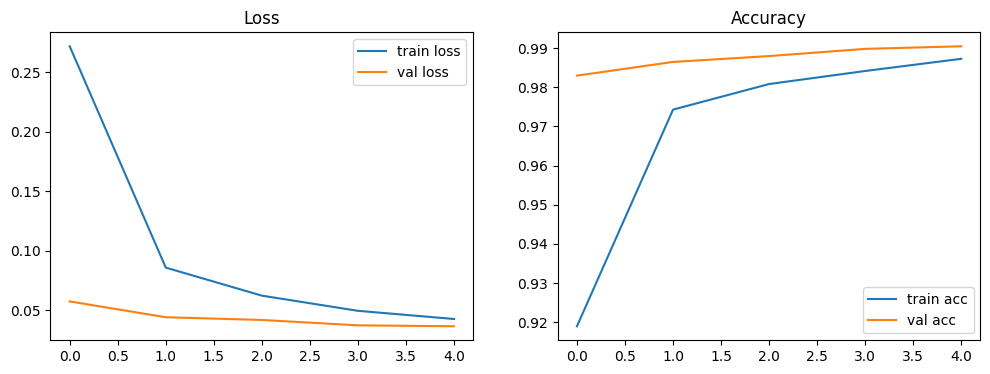


✅ Test Accuracy: 0.9905
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

📄 Classification Report:

              precision    recall  f1-score   support

           0     0.9888    0.9939    0.9913       980
           1     0.9913    0.9982    0.9947      1135
           2     0.9913    0.9893    0.9903      1032
           3     0.9921    0.9931    0.9926      1010
           4     0.9879    0.9990    0.9934       982
           5     0.9876    0.9854    0.9865       892
           6     0.9927    0.9875    0.9901       958
           7     0.9893    0.9883    0.9888      1028
           8     0.9867    0.9928    0.9898       974
           9     0.9970    0.9762    0.9865      1009

    accuracy                         0.9905     10000
   macro avg     0.9905    0.9904    0.9904     10000
weighted avg     0.9905    0.9905    0.9905     10000



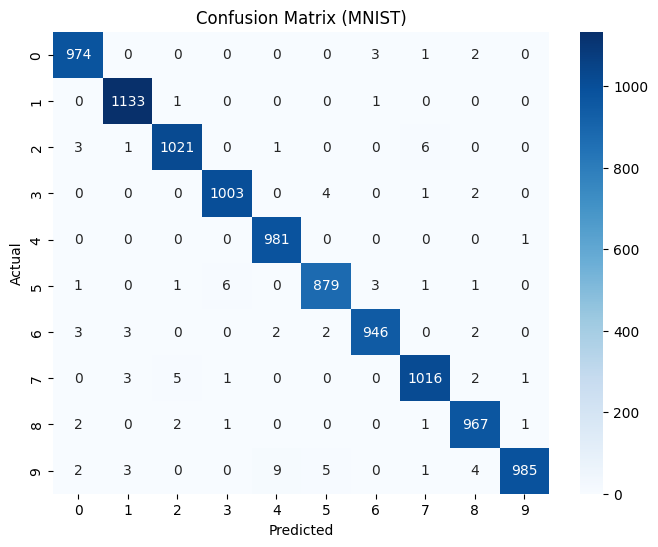

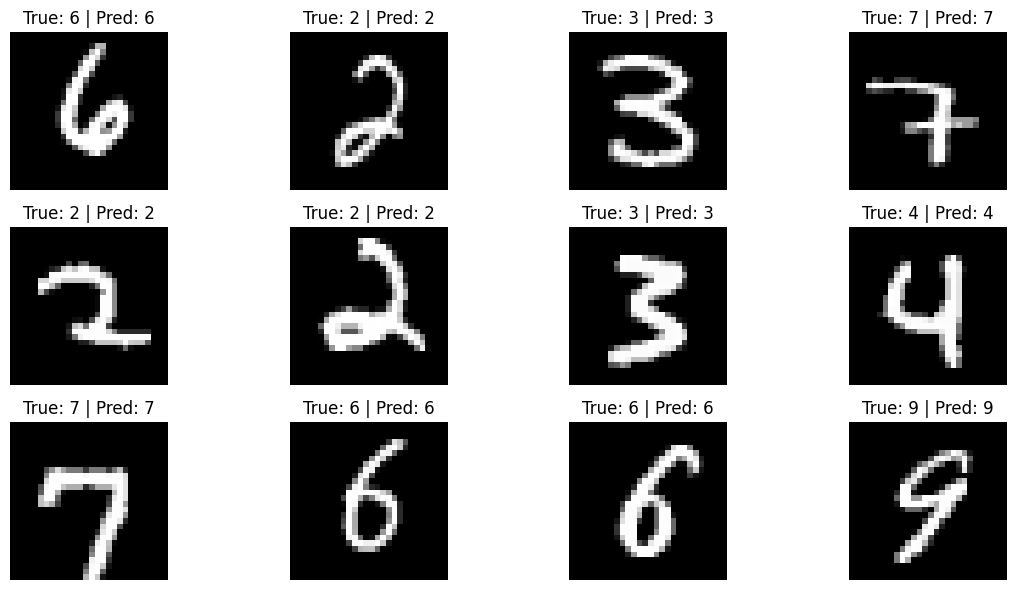


💾 Model saved as 'mnist_cnn_model.h5'


In [1]:
# ====== Task 3: Handwritten Character Recognition (MNIST) ======
# ایک ہی code block — Colab/Jupyter پر paste کر کے چلائیں

# Step 0: libraries import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random

# Step 1: reproducibility (optional)
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Step 2: MNIST dataset load (built-in)
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 3: preprocessing - reshape and normalize
# CNN expects shape (28,28,1)
X_train = X_train.reshape((-1,28,28,1)).astype("float32") / 255.0
X_test  = X_test.reshape((-1,28,28,1)).astype("float32") / 255.0

# Step 4: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')   # 10 classes (digits 0-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # sparse because labels are integers
              metrics=['accuracy'])

model.summary()  # model architecture (optional)

# Step 5: Train the model (epochs small for speed; agar time ho to epochs badha do)
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=5,        # fast run; change to 8-12 for better accuracy
                    batch_size=128,
                    verbose=2)

# Step 6: Plot training history (loss & accuracy)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 8: Predictions on test set
y_probs = model.predict(X_test)           # probabilities
y_pred  = np.argmax(y_probs, axis=1)     # predicted labels as integers

# Step 9: Classification report & overall accuracy
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Step 10: Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MNIST)')
plt.show()

# Step 11: Show some sample test images with predictions
num_show = 12
indices = np.random.choice(len(X_test), num_show, replace=False)
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    ax = plt.subplot(3, 4, i+1)
    img = X_test[idx].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 12: Save model (optional)
model.save("mnist_cnn_model.h5")
print("\n💾 Model saved as 'mnist_cnn_model.h5'")
